In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('titanictrain.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Pclass - ticket class
#SibSp - siblings or spouse aboard
#parch - parents or children aboard
#embarked - port they got on

In [8]:
#Potential Questions - rich survive? Women and children survive more than men? Old die? 
#Pclass death rates and Fare death rates have perfect correlation?

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Numeric vs Categorical Variables (Histograms vs Value Counts)
#Easy to tell age sibsp parch and fare are all numerial variables
#categorical variables didn't show up, or they are represented as 0,1 or 1,2,3.
#This break up of the variables is listed below

In [11]:
df_num  = df[["Age", "SibSp" , "Parch", "Fare"]]
df_cat = df[["Embarked" , "Cabin" , "Sex" , "Pclass" , "Survived"]]

C:\Users\shafim\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shafim\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


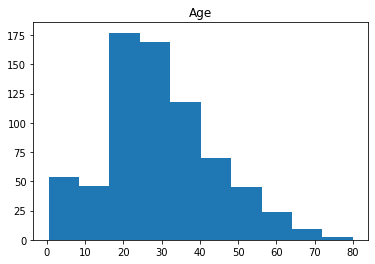

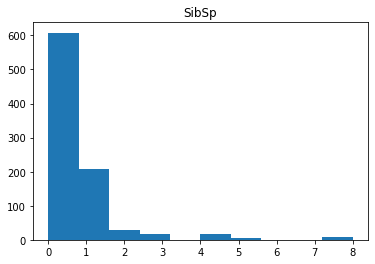

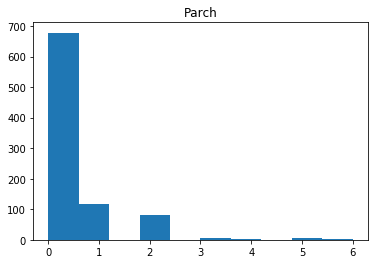

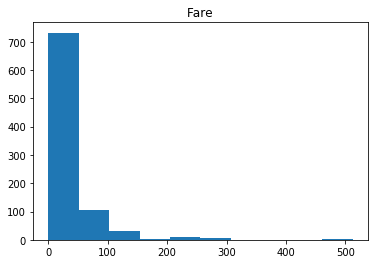

In [12]:
for i in df_num:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [13]:
print(df_num.corr())

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


In [14]:
#Next we could look at survival rates between these variables. 
pd.pivot_table(df, index = 'Survived', values = ["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [15]:
#potential predictions? Younger people, richer people, people with parents or children aboard, and people w/o sibsp survived

In [16]:
import seaborn as sns

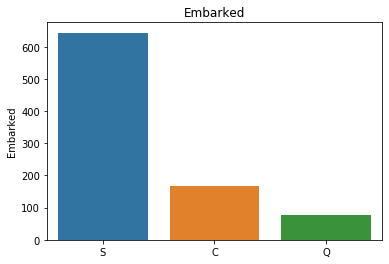

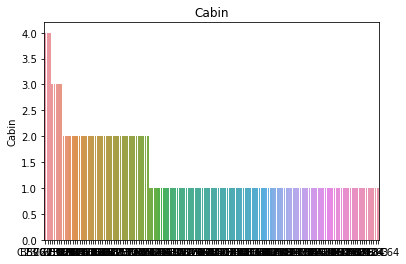

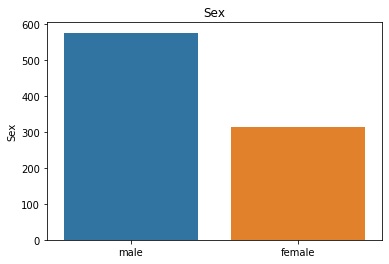

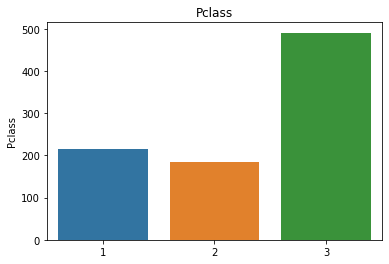

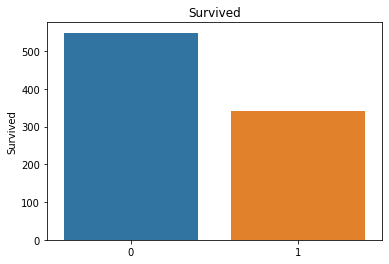

In [17]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [18]:
#Now we want to look at the dependent variable and make a pivot table to see if people survived

In [19]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
for i in df_cat.columns:
    print(pd.pivot_table(df, index = 'Survived', columns = i, values = 'Ticket', aggfunc = 'count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
Cabin     A10  A14  A16  A19  A20  A23  A24  A26  A31  A32  ...   E8  F E69  \
Survived                                                    ...               
0         1.0  1.0  NaN  1.0  NaN  NaN  1.0  NaN  NaN  1.0  ...  NaN    NaN   
1         NaN  NaN  1.0  NaN  1.0  1.0  NaN  1.0  1.0  NaN  ...  2.0    1.0   

Cabin     F G63  F G73   F2  F33  F38   F4   G6    T  
Survived                                              
0           1.0    2.0  1.0  NaN  1.0  NaN  2.0  1.0  
1           NaN    NaN  2.0  3.0  NaN  2.0  2.0  NaN  

[2 rows x 147 columns]
Sex       female  male
Survived              
0             81   468
1            233   109
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


ValueError: Grouper for 'Survived' not 1-dimensional

In [21]:
#Time to work with missing values
#We can either remove the missing value (Not ideal since we have minimal data), we can replace with mean or another estimate
#OR we can make a ML algorithm to estimate the missing values

In [22]:
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [23]:
age_avg = df.Age.mean()
print(age_avg)

29.69911764705882


In [24]:
df.Age = df.Age.fillna(age_avg)

In [25]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [26]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [27]:
mode_embarked = df.Embarked.mode()
print(mode_embarked)

0    S
dtype: object


In [28]:
df.Embarked = df.Embarked.fillna(mode_embarked)

In [29]:
mode_cabin = df.Cabin.mode()
df.Cabin = df.Cabin.fillna(mode_cabin)

In [30]:
Z = pd.DataFrame()

In [31]:
Z['Pclass']=df['Pclass']
Z['Sex']=df['Sex']
Z['Age']=df['Age']
Z['SibSp']=df['SibSp']
Z['Parch']=df['Parch']
Z['Fare']=df['Fare']
Z['Embarked']=df['Embarked']

In [32]:
y = df['Survived']

In [33]:
pd.get_dummies(Z.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [34]:
Z['Sex']=pd.get_dummies(Z.Sex)['female']

In [35]:
Z['Embarked']=pd.get_dummies(Z, columns = ['Embarked'], drop_first = True)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
Z = scaler.fit_transform(Z)

In [39]:
Z

array([[ 0.82737724, -0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517,  0.82737724],
       [-1.56610693,  1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529, -1.56610693],
       [ 0.82737724,  1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426,  0.82737724],
       ...,
       [ 0.82737724,  1.35557354,  0.        , ...,  2.00893337,
        -0.17626324,  0.82737724],
       [-1.56610693, -0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104, -1.56610693],
       [ 0.82737724, -0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783,  0.82737724]])

In [49]:
Z_train,Z_test,y_train,y_test = train_test_split(Z, y, test_size = 0.2, random_state = 0)

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = 'l2' , C=1)

In [51]:
model.fit(Z_train, y_train)

C:\Users\shafim\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(Z_test)))

0.7988826815642458


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.866


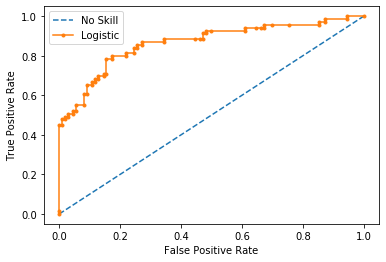

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(Z_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(Z_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [79]:
model_rf = RandomForestRegressor(n_estimators = 20, oob_score = True, random_state = 42)

In [80]:
model_rf.fit(Z_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [84]:
model_rf.score(Z_test,y_test)

0.42336587589470165

In [81]:
model_rf.oob_score_

0.3517129162808057

In [82]:
y_oob = model_rf.oob_prediction_
#y_oob is the probability of survival for each of the observations.
print(roc_auc_score(y_train,y_oob))

0.8461371582100512


In [83]:
from sklearn.metrics import confusion_matrix

In [85]:
y_predicted = model.predict(Z_test)

TypeError: 'str' object is not callable

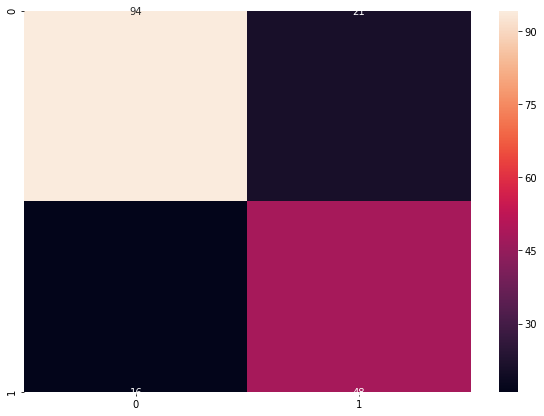

In [91]:
%matplotlib inline
import seaborn as sns
cm = confusion_matrix(y_predicted,y_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.ylabel('Truth')
plt.xlabel('Predicted')

In [92]:
cm

array([[94, 21],
       [16, 48]], dtype=int64)